In [28]:
# sklearn imports
from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering
from sklearn.datasets.samples_generator import make_blobs

# import opencv
import cv2

# matplotlib imports

from matplotlib import pyplot as plt

# other imports
import os
import re
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
def orderFrames(delimiter,frames):
    end = "_{0}".format(frames[0].split(delimiter)[-1])
    return len(frames), end

In [3]:
def least_common(data: list): 
    """ returns least common element"""
    return Counter(data).most_common()[-1]

In [4]:
def crop_img(start, stop, old_path, new_path):
    img = cv2.imread(old_path)
    cv2.imwrite(new_path, img[:, start:stop])
    return True

In [13]:
dir_frames = 'Frames/'
frames = os.listdir(dir_frames)

size, end = orderFrames('_', frames)

# accessing first image
first_img = "0{0}".format(end)
original_image = cv2.imread('{0}{1}'.format(dir_frames, first_img))

In [25]:
img_shape = np.array(original_image.shape)
# (np.prod(img_shape[:2]), img_shape[-1])
original_image.reshape((np.prod(img_shape[:2]), img_shape[-1]))

array([[ 1,  0, 50],
       [ 1,  0, 50],
       [ 1,  0, 51],
       ...,
       [ 3,  0, 10],
       [ 3,  0, 10],
       [ 3,  0, 10]], dtype=uint8)

first clustering completed
second clustering completed
start and stop founds


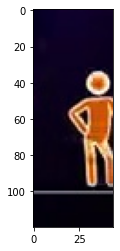

In [29]:
# vectorizing image
img_shape = original_image.shape
vectorized = original_image.reshape((np.prod(img_shape[:2]), img_shape[-1]))

# separating image in 2 clusters
clusters = 2
model = KMeans(n_clusters=clusters, algorithm='auto')
model.fit(vectorized)
labels = model.predict(vectorized)
print('first clustering completed')

"""
    importante testar resultados com images clusterizadas também
"""
# # transforming float to int 
# centers = np.uint8(model.cluster_centers_)
# result = centers[labels.flatten()]
# new_img = result.reshape((original_image.shape))
# plt.imshow(new_img)

# getting only pixels with less occurrences
lcl = least_common(labels)[0] # lcl = least_common_label

pixels = []
reshaped_label = labels.reshape(original_image.shape[:2])
for i, line in enumerate(reshaped_label):
    for j, val in enumerate(line):
        if val == lcl: pixels.append([i,j])
pixels = np.array(pixels)

# getting position of classes 
specCluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
lsc = specCluster.fit_predict(pixels) # labels spectral clustering
print('second clustering completed')

# getting positions of least common group 
x_pos = np.array([[pixels[pos,0], pixels[pos,1]] for pos, val in enumerate(lsc) if val == least_common(lsc)[0]])
start, stop = min(x_pos[:,1]),max(x_pos[:,1])
print('start and stop founds')

# cropping image based on position gaved

all_img = original_image[:,start:stop]
plt.imshow(all_img)

In [31]:
i

0

In [33]:
# cropping all images and saving in just_dance_dataset
for i in range(size):
    old_path = '{0}{1}{2}'.format(dir_frames,i,end)
    new_path = 'Test/just_dance_dataset/{0}{1}'.format(i,'_obj.jpg')
    crop_img(start, stop, old_path, new_path)